# LSTM on AMZON FINE FOOD Review

# Objective :-

1). Take the amazon fine food review and divide the data in to train and test .

2). Find the frequency of each word on the corupus and sort it as it frequecny .

3). Find the index of word from the frequecy dictory for each word in the sentences .

4). After that try different LSTM 

In [2]:
import os 
os.getcwd()

'C:\\Users\\Nicky\\Desktop\\my work\\Deep learning'

In [88]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization, Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.preprocessing import sequence
from keras.initializers import he_normal
import matplotlib.pyplot as plt

# Load Dataset

In [109]:
import sqlite3 as sql
import pandas as pd
#Using sqlite3 to retrieve data from sqlite file

con = sql.connect("final.sqlite")#Loading Cleaned/ Preprocesed text that we did in Text Preprocessing

#Using pandas functions to query from sql table
food1 = pd.read_sql_query("""
SELECT * FROM Reviews 
""",con)

#Reviews is the name of the table given
#Taking only the data where score != 3 as score 3 will be neutral and it won't help us much

In [110]:
food1.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,b'june saw charm group rose begin droop pep ch...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
3,150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...,b'get movi sound track sing along carol king g...
4,150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,b'entertain rhyme catchi illustr imagin fit ri...


In [111]:
def label(x):
    if x == "positive":
        return 1
    else:
        return 0
food1["Score"] = food1["Score"].map(label) #Map all the scores as the function polarity i.e. positive or negative
food1=food1.sample(40000)

# Split the data in train and test before finding the vocabulary

In [112]:
x_train, x_test, y_train, y_test = train_test_split(food1,food1['Score'],test_size=0.40,shuffle=False,random_state=42)

In [114]:
x_train.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
279320,14621,14622,B0032BXUJM,AGLKENC7EJDYW,"4u2 ""FAB""",1,1,1,1305244800,Great Coffee,"This coffee is bold and strong, just how I lik...",b'coffe bold strong like dont like bold strong...


# Frequency of each word in corupus and create index For each word

In [115]:
from collections import Counter
from itertools import islice


def frequency_of_words(text):
    all_words=[]
    for sent in text:
        words = sent.split()
        all_words += words
    print("Shape of the Corupus : ",text.shape)
    print("Number of words present in Corupus : ",len(all_words))
    
    counts = Counter(all_words)
    print("Number of unique words present in whole corpus: ",len(counts.most_common()))
    vocab_size = len(counts.most_common()) + 1
    top_words_count = 5000
    sort_word= counts.most_common(top_words_count)
    word_index = dict()
    i = 1
    for word,frequency in sorted_words:
        word_index[word] = i
        i += 1
    
    return counts,word_index

In [116]:
x_train_text=x_train['CleanedText'].values
x_test_text=x_test['CleanedText'].values

In [117]:
#Creating the frequency and index for each word in the training data 
train_counts,train_word_index=frequency_of_words(x_train_text) 

Shape of the Corupus :  (24000,)
Number of words present in Corupus :  949842
Number of unique words present in whole corpus:  19454


In [119]:
print("***************************************************")
print("Top 15 words with their frequencies:")
print(train_counts.most_common(15))
print("***************************************************")
print("Top 15 words with their index:")
print(list(islice(train_word_index.items(), 15)))

***************************************************
Top 15 words with their frequencies:
[(b'not', 14146), (b'like', 11795), (b'tast', 11221), (b'flavor', 8739), (b'good', 8656), (b'use', 8064), (b'product', 7916), (b'one', 7831), (b'love', 7310), (b'tri', 7043), (b'great', 6974), (b'tea', 6433), (b'coffe', 6337), (b'get', 5959), (b'make', 5585)]
***************************************************
Top 15 words with their index:
[(b'not', 1), (b'like', 2), (b'tast', 3), (b'flavor', 4), (b'good', 5), (b'product', 6), (b'use', 7), (b'one', 8), (b'love', 9), (b'great', 10), (b'tri', 11), (b'coffe', 12), (b'tea', 13), (b'get', 14), (b'make', 15)]


In [118]:
#Creating the frequency and index for each word in the test data
test_counts,test_word_index=frequency_of_words(x_test_text)

Shape of the Corupus :  (16000,)
Number of words present in Corupus :  629265
Number of unique words present in whole corpus:  16355


In [120]:
print("***************************************************")
print("Top 15 words with their frequencies:")
print(test_counts.most_common(15))
print("***************************************************")
print("Top 15 words with their index:")
print(list(islice(test_word_index.items(), 15)))

***************************************************
Top 15 words with their frequencies:
[(b'not', 9366), (b'like', 7735), (b'tast', 7446), (b'flavor', 5773), (b'good', 5598), (b'product', 5284), (b'one', 5133), (b'use', 5054), (b'love', 5022), (b'great', 4665), (b'tri', 4574), (b'coffe', 4249), (b'tea', 4145), (b'get', 3812), (b'make', 3655)]
***************************************************
Top 15 words with their index:
[(b'not', 1), (b'like', 2), (b'tast', 3), (b'flavor', 4), (b'good', 5), (b'product', 6), (b'use', 7), (b'one', 8), (b'love', 9), (b'great', 10), (b'tri', 11), (b'coffe', 12), (b'tea', 13), (b'get', 14), (b'make', 15)]


# Create sentence using there index

In [121]:
#Mapping the index in traing dataset
def sent_index(row):  
    ab = []
    for word in row['CleanedText'].split():
        if word in word_index:
            ab.append(word_index[word]) 
        else:
            ab.append(0)            
    return ab

x_train['Text_Index'] = x_train.apply(lambda row: sent_index(row),axis=1)
x_train.head(2)

C:\Users\Nicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Text_Index
279320,14621,14622,B0032BXUJM,AGLKENC7EJDYW,"4u2 ""FAB""",1,1,1,1305244800,Great Coffee,"This coffee is bold and strong, just how I lik...",b'coffe bold strong like dont like bold strong...,"[12, 548, 149, 2, 22, 2, 548, 149, 12, 1]"
74560,561215,561216,B000FMIMNK,AJNESBDD098FH,an open mind,1,1,1,1335139200,product getting rare,This product used to be available in the box s...,b'product use avail box store not longer went ...,"[6, 7, 248, 39, 37, 1, 340, 316, 25, 56, 631, ..."


In [122]:
#Mapping the index in test dataset
def sent_index(row):  
    ab = []
    for word in row['CleanedText'].split():
        if word in word_index:
            ab.append(word_index[word]) 
        else:
            ab.append(0)            
    return ab

x_test['Text_Index'] = x_test.apply(lambda row: sent_index(row),axis=1)
x_test.head(2)

C:\Users\Nicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Text_Index
119806,479652,479653,B000P5Y0WY,A1P3ESGS4XZPSO,Maryjane Heyer,0,0,1,1273449600,"tasty, but NOT hard candy!","kasugai makes a fine gummy, it's true. But gu...",b'kasugai make fine gummi true gummi not hard ...,"[0, 15, 266, 700, 610, 700, 1, 129, 151, 251, 0]"
125780,42240,42241,B000S16WVC,A1ASVXR85VA5C5,"DiscriminatingNotPickyGirl ""Maryanne""",0,0,1,1230422400,Love the texture,Amaranth is a new texture treat...a real adven...,b'amaranth new textur treat real adventur load...,"[4293, 175, 176, 62, 179, 3076, 1091, 408, 239..."


# Add Padding for lstm to work fast

In [123]:
x_train=x_train['Text_Index'].values
x_test=x_test['Text_Index'].values

In [125]:
# truncate and/or pad input sequences
max_review_length = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print(x_train.shape)
print(x_train[1])

(24000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

# Ploting Function for check the error vs epoch plot :-

In [126]:
%matplotlib notebook
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(fig,x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
def train_test_epoch_plot(history,nb_epoch=10):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('nb_epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    # list of epoch numbers
    x = list(range(1,nb_epoch+1))
    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    # we will get val_loss and val_acc only when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy
    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have a list of length equal to number of epochs
    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(fig,x, vy, ty, ax)

# Simple LSTM model

In [127]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 32)           2386624   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 2,439,925
Trainable params: 2,439,925
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
history=model.fit(x_train, y_train, nb_epoch=10, batch_size=64,verbose=1,
          validation_data=(x_test, y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

#x_train, x_test, y_train, y_test

C:\Users\Nicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 24000 samples, validate on 16000 samples
Epoch 1/10
24000/24000 [==============================] - 319s 13ms/step - loss: 0.3197 - acc: 0.8745 - val_loss: 0.2474 - val_acc: 0.8919
Epoch 2/10
24000/24000 [==============================] - 356s 15ms/step - loss: 0.2167 - acc: 0.9098 - val_loss: 0.2395 - val_acc: 0.9056
Epoch 3/10
24000/24000 [==============================] - 353s 15ms/step - loss: 0.1847 - acc: 0.9254 - val_loss: 0.2400 - val_acc: 0.9021
Epoch 4/10
24000/24000 [==============================] - 352s 15ms/step - loss: 0.1649 - acc: 0.9351 - val_loss: 0.2511 - val_acc: 0.8971
Epoch 5/10
24000/24000 [==============================] - 352s 15ms/step - loss: 0.1457 - acc: 0.9422 - val_loss: 0.2777 - val_acc: 0.9032
Epoch 6/10
24000/24000 [==============================] - 352s 15ms/step - loss: 0.1293 - acc: 0.9498 - val_loss: 0.2873 - val_acc: 0.8892
Epoch 7/10
24000/24000 [==============================] - 363s 15ms/step - loss: 0.1147 - acc: 0.9559 - val_loss: 0.

Test loss: 0.37373909090273083
Test Accuracy: 88.72%


<IPython.core.display.Javascript object>


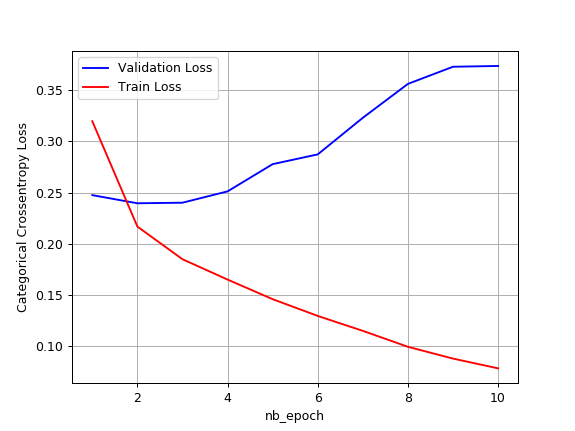

In [129]:
print('Test loss:', scores[0])
print("Test Accuracy: %.2f%%" % (scores[1]*100))
train_test_epoch_plot(history=history)

Here we can able to see that our cross entropy error is not decreasing for test dataset , so that we are doing overfitting of the model 

# For avoiding the overfitting of the model lets add batch normalization ,dropout 

In [139]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.40))
model.add(LSTM(80,return_sequences=True))
model.add(Dropout(0.40))
model.add(LSTM(60,return_sequences=True))
model.add(Dropout(0.40))
model.add(LSTM(40,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(LSTM(20))
model.add(Dropout(0.40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 400, 32)           2386624   
_________________________________________________________________
lstm_26 (LSTM)               (None, 400, 100)          53200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 400, 100)          0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 400, 80)           57920     
_________________________________________________________________
dropout_25 (Dropout)         (None, 400, 80)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 400, 60)           33840     
_________________________________________________________________
dropout_26 (Dropout)         (None, 400, 60)           0         
__________

In [140]:
history=model.fit(x_train, y_train, nb_epoch=10, batch_size=64,verbose=1,
          validation_data=(x_test, y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

#x_train, x_test, y_train, y_test

C:\Users\Nicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 24000 samples, validate on 16000 samples
Epoch 1/10
24000/24000 [==============================] - 1637s 68ms/step - loss: 0.3596 - acc: 0.8664 - val_loss: 0.4119 - val_acc: 0.8661
Epoch 2/10
24000/24000 [==============================] - 1672s 70ms/step - loss: 0.2433 - acc: 0.9046 - val_loss: 0.2551 - val_acc: 0.8973
Epoch 3/10
24000/24000 [==============================] - 1676s 70ms/step - loss: 0.1988 - acc: 0.9238 - val_loss: 0.2907 - val_acc: 0.8638
Epoch 4/10
24000/24000 [==============================] - 1658s 69ms/step - loss: 0.1649 - acc: 0.9396 - val_loss: 0.2682 - val_acc: 0.8938
Epoch 5/10
24000/24000 [==============================] - 1621s 68ms/step - loss: 0.1354 - acc: 0.9523 - val_loss: 0.3242 - val_acc: 0.8587
Epoch 6/10
24000/24000 [==============================] - 1637s 68ms/step - loss: 0.1143 - acc: 0.9629 - val_loss: 0.3408 - val_acc: 0.8728
Epoch 7/10
24000/24000 [==============================] - 1659s 69ms/step - loss: 0.0975 - acc: 0.9689 - val_l

Test loss: 0.5128035532403737
Test Accuracy: 87.38%


<IPython.core.display.Javascript object>


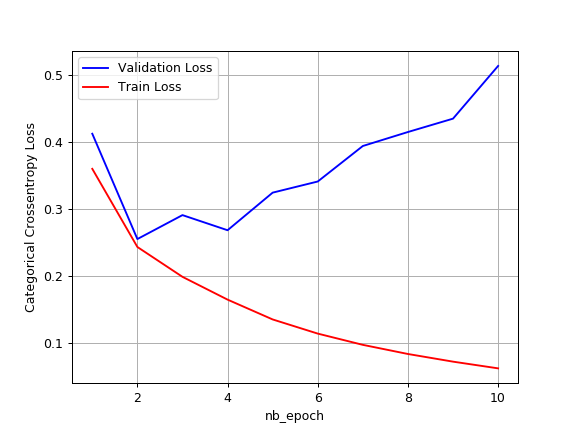

In [141]:
print('Test loss:', scores[0])
print("Test Accuracy: %.2f%%" % (scores[1]*100))
train_test_epoch_plot(history=history)

Still after 2 epoch we are overfitting the model so lets add some regularization :

# For avoiding the overfit let's try some regularier .

https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/

In [171]:
from keras.regularizers import L1L2
regularizer_ele = L1L2(0.01, 0.01)
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100,return_sequences=True,bias_regularizer=regularizer_ele))
model.add(Dropout(0.40))
model.add(LSTM(100,return_sequences=True,bias_regularizer=regularizer_ele))
model.add(Dropout(0.40))
model.add(LSTM(100,return_sequences=True,bias_regularizer=regularizer_ele))
model.add(Dropout(0.40))
model.add(LSTM(20))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 400, 32)           2386624   
_________________________________________________________________
lstm_96 (LSTM)               (None, 400, 100)          53200     
_________________________________________________________________
dropout_91 (Dropout)         (None, 400, 100)          0         
_________________________________________________________________
lstm_97 (LSTM)               (None, 400, 100)          80400     
_________________________________________________________________
dropout_92 (Dropout)         (None, 400, 100)          0         
_________________________________________________________________
lstm_98 (LSTM)               (None, 400, 100)          80400     
_________________________________________________________________
dropout_93 (Dropout)         (None, 400, 100)          0         
__________

In [172]:
history=model.fit(x_train, y_train, nb_epoch=10, batch_size=64,verbose=1,
          validation_data=(x_test, y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

#x_train, x_test, y_train, y_test

C:\Users\Nicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 24000 samples, validate on 16000 samples
Epoch 1/10
24000/24000 [==============================] - 2543s 106ms/step - loss: 4.8738 - acc: 0.8562 - val_loss: 3.4982 - val_acc: 0.8921
Epoch 2/10
24000/24000 [==============================] - 2694s 112ms/step - loss: 2.4367 - acc: 0.9121 - val_loss: 1.6254 - val_acc: 0.8995
Epoch 3/10
24000/24000 [==============================] - 2695s 112ms/step - loss: 0.9616 - acc: 0.9268 - val_loss: 0.5810 - val_acc: 0.8826
Epoch 4/10
24000/24000 [==============================] - 2664s 111ms/step - loss: 0.2074 - acc: 0.9410 - val_loss: 0.2733 - val_acc: 0.8926
Epoch 5/10
24000/24000 [==============================] - 2665s 111ms/step - loss: 0.1233 - acc: 0.9549 - val_loss: 0.3800 - val_acc: 0.8911
Epoch 6/10
24000/24000 [==============================] - 2605s 109ms/step - loss: 0.1006 - acc: 0.9633 - val_loss: 0.3881 - val_acc: 0.8739
Epoch 7/10
24000/24000 [==============================] - 2582s 108ms/step - loss: 0.0788 - acc: 0.9728 

Test loss: 0.536583942502737
Test Accuracy: 87.90%


<IPython.core.display.Javascript object>


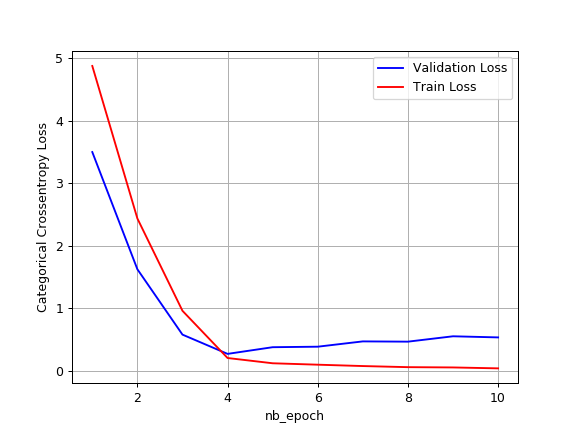

In [173]:
print('Test loss:', scores[0])
print("Test Accuracy: %.2f%%" % (scores[1]*100))
train_test_epoch_plot(history=history)

# Preformance Table:-

In [174]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithms", "Accuracy","Loss-epcoh plot"]

x.add_row(["1-Layered LSTM", "88.72%","Diverging"])
x.add_row(["5-Layered LSTM+BN+DROPOUT", "87.38%","Diverging"])
x.add_row(["4-Layered LSTM+BN+DROPOUT+Reg", "87.90%%","converging"])

print(x)

+-------------------------------+----------+-----------------+
|           Algorithms          | Accuracy | Loss-epcoh plot |
+-------------------------------+----------+-----------------+
|         1-Layered LSTM        |  88.72%  |    Diverging    |
|   5-Layered LSTM+BN+DROPOUT   |  87.38%  |    Diverging    |
| 4-Layered LSTM+BN+DROPOUT+Reg | 87.90%%  |    converging   |
+-------------------------------+----------+-----------------+


# Conclusion :-

1). In this assignement we split the data in to train and test after that we found the frequecy of the word ,and idex of the word sort by frequecy .

2). IF we chose only signle LSTM on the network we are overfitting the model ,as we can able to see on the 1st plot validation loss is not decresing  where as training loss is decresing very drascically .

3). So we tried with batch normalization and dropout in the network , so we found that till 2 epoch model is converging after than more epoch it is diverging .

4). For the last model we used the elasticnet regularizer as bias_regularizer by which our model is not overfitting that much .

5). For avoiding the overfitting of the model we required so many resource and experiment .